# Use Josh's tools, do some more data viz

In [1]:
import itertools as it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_temporal_data, load_power_data

%matplotlib inline

In [2]:
files_df = pd.read_pickle('../processed_data/files_df.pkl')
files_df.head()

,dir_name,file_name,path,patient,preictal,train,pib_3,pib_2,pib_1
0,test_1,1_1.mat,test_1/1_1.mat,1,-1,0,848777,1897922,511194
1,test_1,1_10.mat,test_1/1_10.mat,1,-1,0,1805838,1484367,216014
2,test_1,1_100.mat,test_1/1_100.mat,1,-1,0,1241170,1900609,284337
3,test_1,1_1000.mat,test_1/1_1000.mat,1,-1,0,1743604,1513067,231791
4,test_1,1_1001.mat,test_1/1_1001.mat,1,-1,0,2139217,1235885,187611


In [3]:
train_df = files_df[files_df.train==1]
train_df.head()

,dir_name,file_name,path,patient,preictal,train,pib_3,pib_2,pib_1
6126,train_1,1_1000_0.mat,train_1/1_1000_0.mat,1,0,1,789192,2056416,481576
6127,train_1,1_1001_0.mat,train_1/1_1001_0.mat,1,0,1,824351,1985675,485730
6128,train_1,1_1002_0.mat,train_1/1_1002_0.mat,1,0,1,945059,2082889,396960
6129,train_1,1_1003_0.mat,train_1/1_1003_0.mat,1,0,1,796860,2068275,432816
6130,train_1,1_1004_0.mat,train_1/1_1004_0.mat,1,0,1,997601,1962371,409753


# Count up samples

In [4]:
interictal_samples = (train_df.preictal==0).sum()
preictal_samples = (train_df.preictal==1).sum()
training_samples = len(train_df)
test_samples = (files_df.train==0).sum()
total_samples = len(files_df)
sample_counts = [interictal_samples, preictal_samples, training_samples, test_samples, total_samples]
print('Interictal: {}, preictal: {}, training: {}, test: {}, total: {}.'.format(*sample_counts))

Interictal: 5592, preictal: 450, training: 6042, test: 6126, total: 12168.


# Investigate joblib caching performance

Load temporal data...

In [5]:
%%time
sample_interictal_path = train_df[train_df.preictal==0].iloc[0].path
data = load_temporal_data(sample_interictal_path)

CPU times: user 234 ms, sys: 18.8 ms, total: 253 ms
Wall time: 254 ms


Load power data...

In [6]:
%%time
freq, interictal_power_data = load_power_data(sample_interictal_path)

CPU times: user 547 ms, sys: 93.3 ms, total: 640 ms
Wall time: 645 ms


Reload same data...

In [7]:
%%time
freq, interictal_power_data = load_power_data(sample_interictal_path)

CPU times: user 2.12 ms, sys: 9.41 ms, total: 11.5 ms
Wall time: 34 ms


# Compare preictal vs. interictal power spectra

/Users/stephenshank/Software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


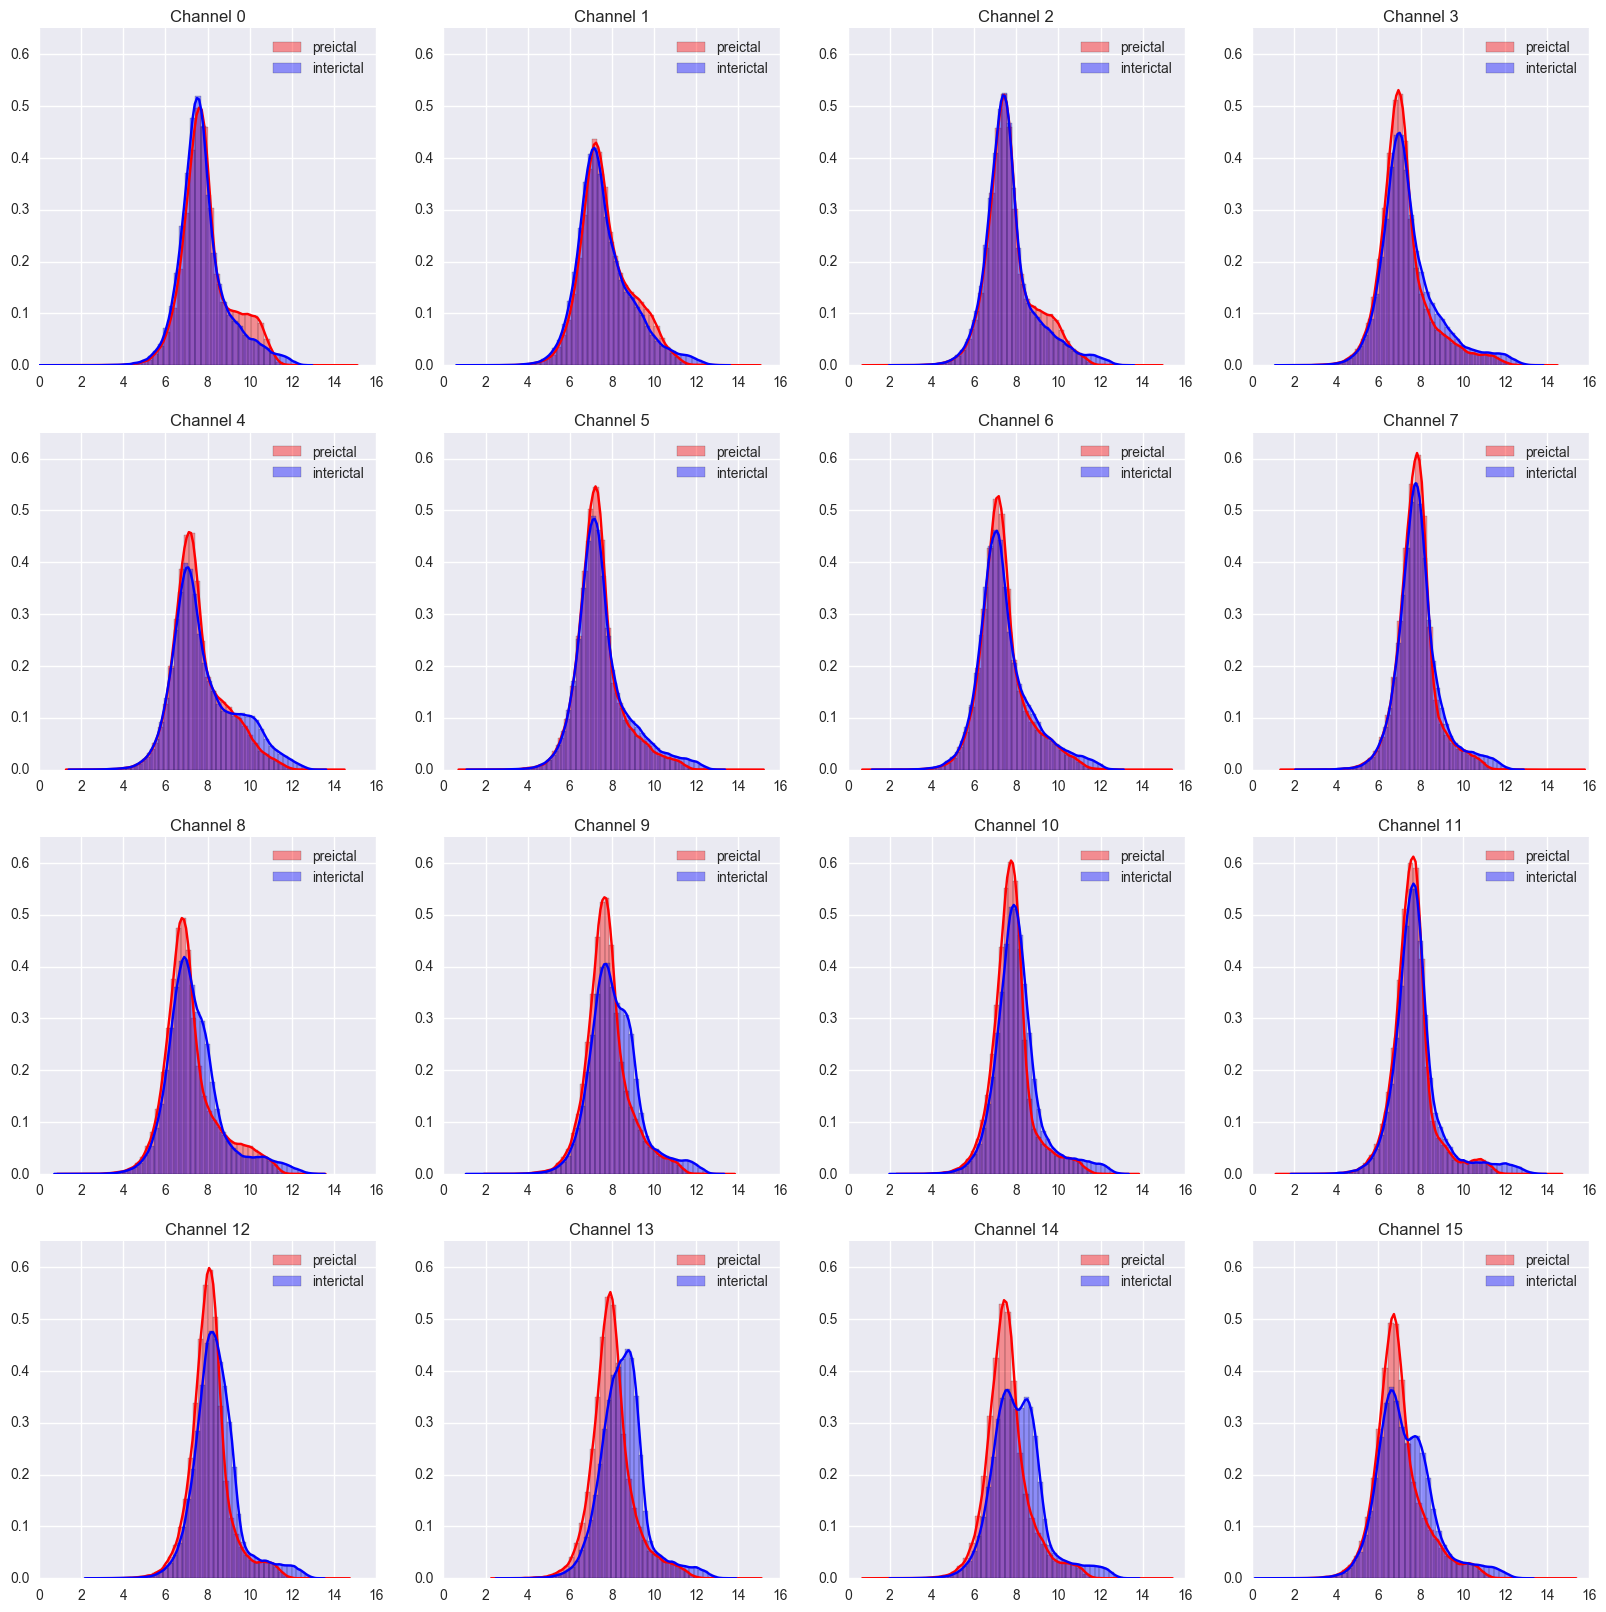

In [8]:
sample_preictal_path = train_df[train_df.preictal==1].iloc[0].path
freq, preictal_power_data = load_power_data(sample_preictal_path)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
indices = it.product(range(4), range(4))
xlims = [0, 16]
ylims = [0, .65]
for I, index in enumerate(indices):
    i, j = index
    sns.distplot(np.log1p(preictal_power_data[I,:]), color='red', ax=axs[i][j], label='preictal')
    sns.distplot(np.log1p(interictal_power_data[I,:]), color='blue', ax=axs[i][j], label='interictal')
    axs[i][j].set_title('Channel %d' % I)
    axs[i][j].legend()
    axs[i][j].set_xlim(xlims)
    axs[i][j].set_ylim(ylims)
plt.show()

# Compare two preictal power spectra

/Users/stephenshank/Software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


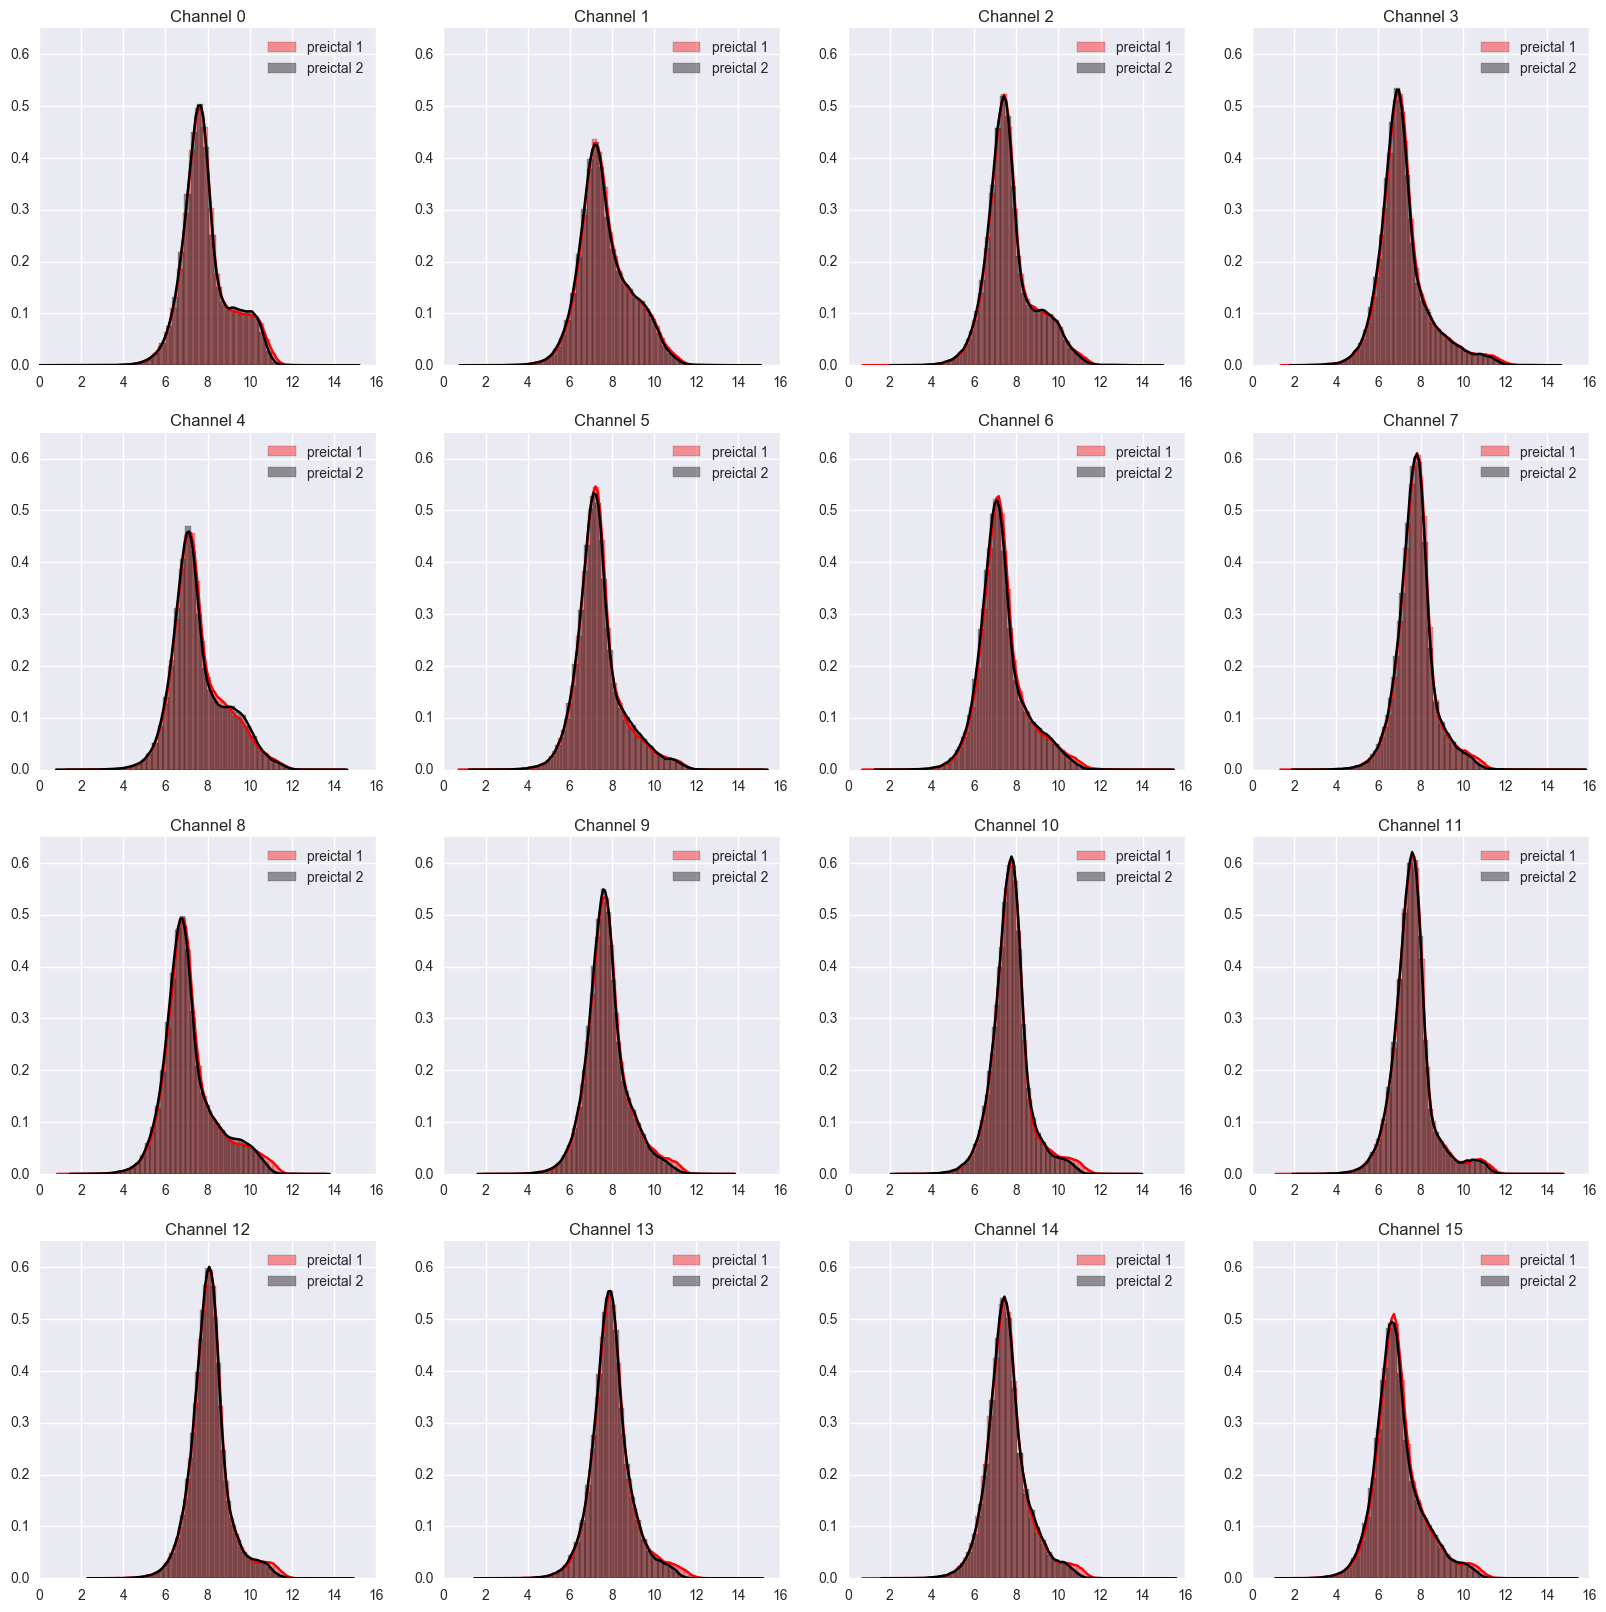

In [9]:
first_preictal_path = train_df[train_df.preictal==1].iloc[0].path
second_preictal_path = train_df[train_df.preictal==1].iloc[1].path
_, first_power_data = load_power_data(first_preictal_path)
_, second_power_data = load_power_data(second_preictal_path)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
indices = it.product(range(4), range(4))
for I, index in enumerate(indices):
    i, j = index
    sns.distplot(np.log1p(first_power_data[I,:]), color='red', ax=axs[i][j], label='preictal 1')
    sns.distplot(np.log1p(second_power_data[I,:]), color='black', ax=axs[i][j], label='preictal 2')
    axs[i][j].set_title('Channel %d' % I)
    axs[i][j].legend()
    axs[i][j].set_xlim(xlims)
    axs[i][j].set_ylim(ylims)
plt.show()

/Users/stephenshank/Software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


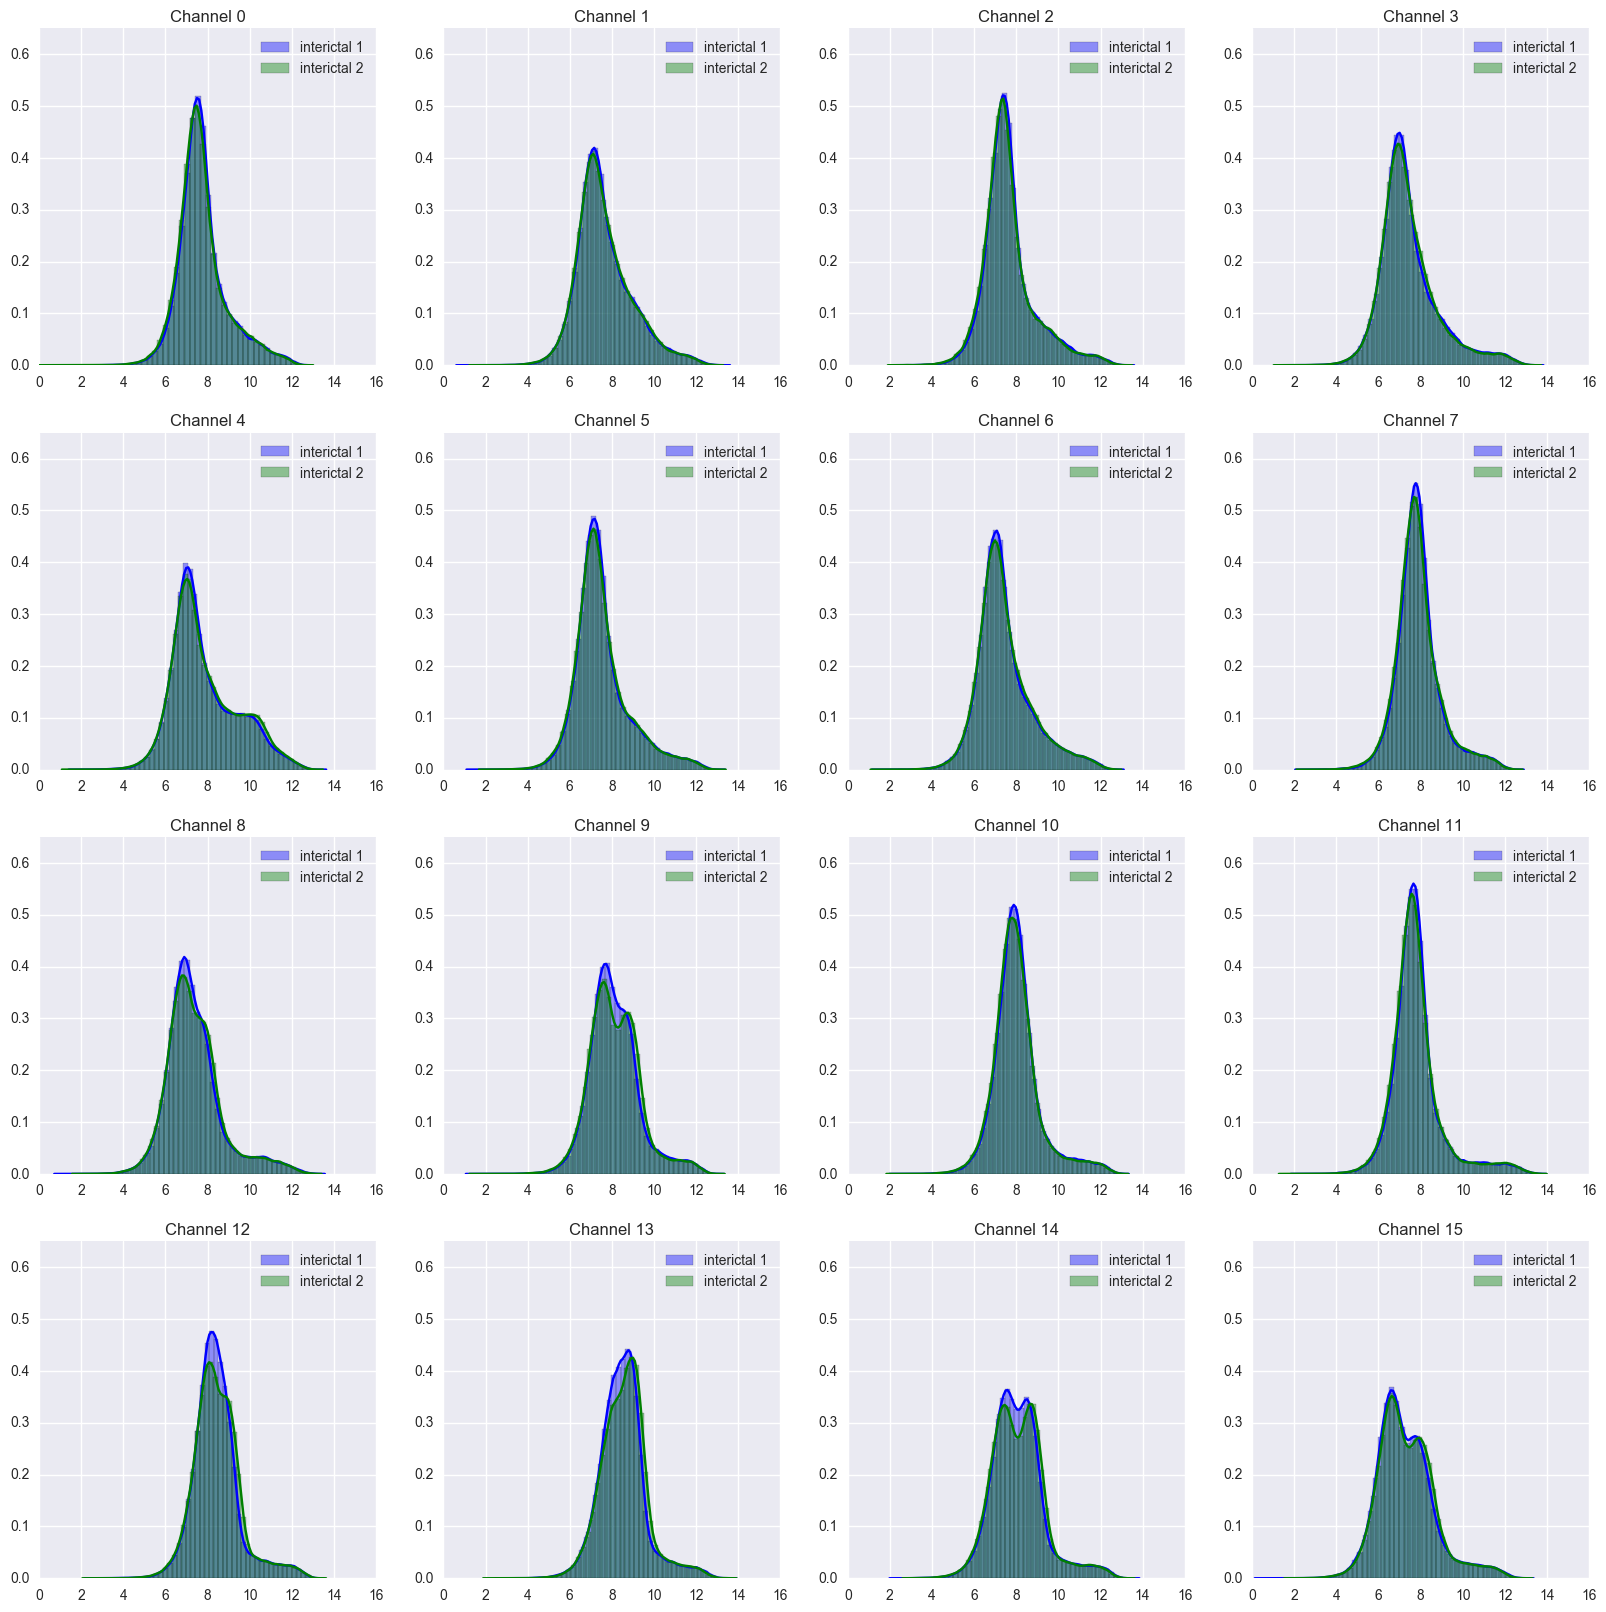

In [10]:
first_interictal_path = train_df[train_df.preictal==0].iloc[0].path
second_interictal_path = train_df[train_df.preictal==0].iloc[1].path
_, first_power_data = load_power_data(first_interictal_path)
_, second_power_data = load_power_data(second_interictal_path)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
indices = it.product(range(4), range(4))
for I, index in enumerate(indices):
    i, j = index
    sns.distplot(np.log1p(first_power_data[I,:]), color='blue', ax=axs[i][j], label='interictal 1')
    sns.distplot(np.log1p(second_power_data[I,:]), color='green', ax=axs[i][j], label='interictal 2')
    axs[i][j].set_title('Channel %d' % I)
    axs[i][j].legend()
    axs[i][j].set_xlim(xlims)
    axs[i][j].set_ylim(ylims)
plt.show()